 Project: Customer Churn Prediction and Analysis

 Description: 

 This project aims to analyze customer data to predict churn 
 (whether a customer will leave or stay) using machine learning models.
 
 Dataset: Telco Customer Churn (IBM)


# 1-Importting libraries

In [2]:
!pip install plotly
!pip install nbformat



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2-Load and Explore the Dataset

In [3]:
# Load dataset
Data = pd.read_csv(r"..\data\Raw-Telco-Customer-Churn.csv")

print("shape:", Data.shape)

# Display first 5 rows
print("sample of Data")
display(Data.head())

# Basic info
print("Dataset info:")
print(Data.info())

# Summary statics
print("Statical Summary:")
print(Data.describe())

shape: (7043, 21)
sample of Data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

# 3-Data Cleaning & Preprocessing

In [15]:
# check nulls
Data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
# check duplicates
Data.duplicated().sum()

22

In [17]:
# view the column names of the dataframe

col_names = Data.columns

col_names

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Our target variable is the `Churn` column. So, I will check its distribution.

In [18]:
# check distribution of Churn column

Data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [4]:
# Some columns like 'TotalCharges' might be object type but numeric in nature
# Convert them to numeric
Data['TotalCharges'] = pd.to_numeric(Data['TotalCharges'], errors='coerce')

In [19]:
# Recheck missing values after conversion
print("\n Missing values after conversion:")
print(Data.isnull().sum())


 Missing values after conversion:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# Fill missing TotalCharges values with median
Data['TotalCharges'].fillna(Data['TotalCharges'].median(), inplace=True)

In [6]:
#Drop customerID (not useful for prediction)
Data.drop('customerID', axis=1, inplace=True)

Replaced blank spaces with NaN and converted TotalCharges to numeric.

Filled missing values in TotalCharges with the median.

Dropped customerID since it doesn’t contribute to prediction.

# 4-Encoding

In [20]:
df_processed = Data.copy()

# Binary encoding for Yes/No columns
binary_cols = df_processed.select_dtypes(include=['object']).columns
binary_cols = [col for col in binary_cols if df_processed[col].nunique() == 2]

label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# One-hot encoding for multiple categories
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print(f" New shape: {df_processed.shape}")
print(f" Final features: {df_processed.columns.tolist()}")


 New shape: (7043, 31)
 Final features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [14]:
df_processed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,True,False,True,False,True,True,False,False,False,True
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,True,False,True,False,False
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,False,False,False,False,False,False,False,False,False,True


# 5-Feature Scaling

In [8]:
# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(f"Shape: {X_scaled.shape}")

Shape: (7043, 30)


Encoded all categorical columns using Label Encoding to make them numerical.

Scaled all numerical columns using StandardScaler to normalize their values and ensure all features are on a similar scale.

## Save the preprocessed data

In [9]:
df_processed= df_processed.replace({True:1, False:0})
output_path = r"..\data\preprocessed_data.csv"
df_processed.to_csv(output_path, index=False)

# 7-Feature Importance

In [10]:
# Identify the most important features using Random Forest
# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, y)

# Get the importance score for each feature
importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort the features by importance and select the top 10
important_features = importances.sort_values(ascending=False).head(10)

# Display the top 10 important features
print("\nTop 10 Important Features:")
print(important_features)


Top 10 Important Features:
TotalCharges                      0.198587
tenure                            0.175923
MonthlyCharges                    0.167846
InternetService_Fiber optic       0.039383
PaymentMethod_Electronic check    0.038892
gender                            0.028211
Contract_Two year                 0.026361
PaperlessBilling                  0.025463
OnlineSecurity_Yes                0.024631
TechSupport_Yes                   0.023627
dtype: float64


# 8-Plotting the top 10 important features

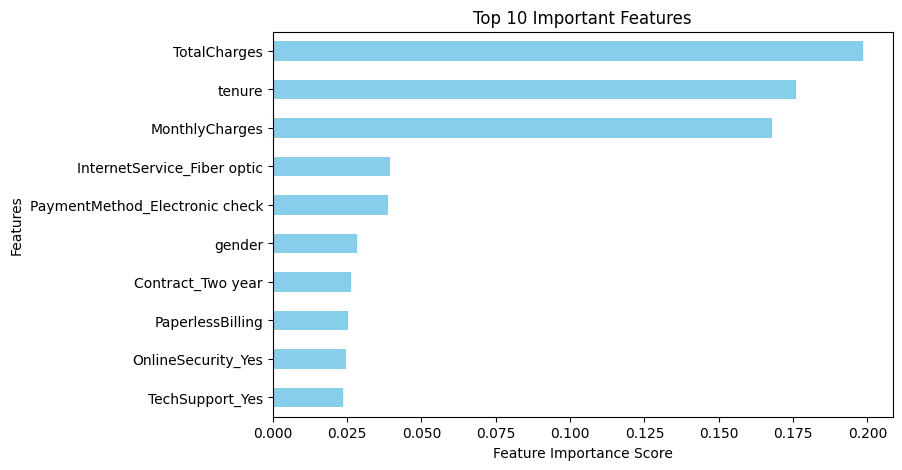

In [18]:
plt.figure(figsize=(8,5))
important_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

### Feature Importance using Random Forest

A Random Forest Classifier was used to identify the most important features that influence customer churn.

The model assigns an importance score to each feature based on how much it contributes to the prediction.

The top 10 most important features were visualized using a horizontal bar chart for better interpretation.


# The dataset is now clean, consistent, and fully numeric, ready for exploratory data analysis (EDA) and model development

# 9-Exploratory Data Analysis (EDA) & Visualizations

Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

In [19]:
fig=make_subplots(rows=1,cols=2)
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['Male','Female'], values=Data['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=['No', 'Yes'], values=Data['Churn'].value_counts(), name="Churn"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)


fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.8, y=0.5, font_size=20, showarrow=False)])
fig.show()

26.6 % of customers switched to another firm.

Customers are 49.5 % female and 50.5 % male

In [20]:
churn_map={0:'No',1:'Yes'}
contract_map={0:'Month-to-month',1:'One year',2:'Two year'}

fig=px.histogram(df_processed,x=Data['Churn'],color=Data['Contract'],barmode='group',labels={'x': 'Churn'})

fig.update_layout()
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service </b>")

fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [21]:
PaymentMethod_map = {
    0: 'Bank transfer',
    1: 'Credit card',
    2: 'Electronic check',
    3: 'Mailed check'
}

counts = Data['PaymentMethod'].value_counts()
labels = counts.index

values = Data['PaymentMethod'].value_counts()


fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
fig.update_layout(
    title_text="<b>Payment Method Distribution</b>",
    legend_title_text="Payment Method"
)
fig.show()


In [22]:
churn_map={0:'No',1:'Yes'}
PaymentMethod_map = {
    0: 'Bank transfer',
    1: 'Credit card',
    2: 'Electronic check',
    3: 'Mailed check'
}

fig=px.histogram(Data,x=Data['Churn'].map(churn_map),color=Data['PaymentMethod'].map(PaymentMethod_map),barmode='group',title="<b>Customer Payment Method distribution w.r.t. Churn</b>",labels={'x': 'Churn'})

fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Major customers who moved out were having Electronic Check as Payment Method.

Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [23]:
Data['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [24]:
Data['InternetService'].unique()
gender_map={0:'Female',1:'Male'}
InternetService_mape={0:'DSL',1:'Fiber optic',2:'No'}
Data[Data['gender']==1][["InternetService", "Churn"]].value_counts()




Series([], Name: count, dtype: int64)

In [25]:
Data['InternetService'].unique()
gender_map={0:'Female',1:'Male'}
InternetService_mape={0:'DSL',1:'Fiber optic',2:'No'}
Data[Data['gender']==0][["InternetService", "Churn"]].value_counts()

Series([], Name: count, dtype: int64)

In [26]:
InternetService_mape={0:'DSL',1:'Fiber optic',2:'No'}
churn_map={0:'No',1:'Yes'}
fig=px.histogram(Data,x=Data['Churn'].map(churn_map),color=Data['InternetService'].map(InternetService_mape),barmode='group',labels={'x': 'Churn'})
fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service </b>")

fig.show()

Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.


In [27]:
dependents_map={0:'No',1:'Yes'}
churn_map={0:'No',1:'Yes'}
fig=px.histogram(Data,x=Data['Churn'].map(churn_map),color=Data['Dependents'].map(dependents_map),barmode='group',labels={'x':'Churn'})

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Dependents </b>")


fig.show()

Customers without dependents are more likely to churn


In [28]:
Partner_map={1:'Yes',0:'No'}
churn_map={0:'No',1:'Yes'}
fig=px.histogram(Data,x=Data['Churn'].map(churn_map),color=Data['Partner'].map(Partner_map),barmode='group',labels={'x':'Churn'})

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Partner </b>")


fig.show()

Customers that doesn't have partners are more likely to churn


In [29]:
Partner_map={1:'Yes',0:'No'}
PaperlessBilling_map={1:'Yes',0:'No'}
fig=px.histogram(Data,x=Data['Churn'].map(churn_map),color=Data['PaperlessBilling'].map(PaperlessBilling_map),barmode='group',labels={'x':'Churn'})

fig.update_layout(title_text="<b>Churn Distribution w.r.t. PaperlessBilling </b>")


fig.show()

# Ranking the Features using RFE

In [12]:
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

for i, col in enumerate(X.columns):
    print(f"{col} selected={rfe.support_[i]}, rank={rfe.ranking_[i]}")


gender selected=True, rank=1
SeniorCitizen selected=False, rank=5
Partner selected=False, rank=2
Dependents selected=False, rank=8
tenure selected=True, rank=1
PhoneService selected=False, rank=16
PaperlessBilling selected=True, rank=1
MonthlyCharges selected=True, rank=1
TotalCharges selected=True, rank=1
MultipleLines_No phone service selected=False, rank=21
MultipleLines_Yes selected=False, rank=6
InternetService_Fiber optic selected=True, rank=1
InternetService_No selected=False, rank=17
OnlineSecurity_No internet service selected=False, rank=11
OnlineSecurity_Yes selected=True, rank=1
OnlineBackup_No internet service selected=False, rank=15
OnlineBackup_Yes selected=False, rank=4
DeviceProtection_No internet service selected=False, rank=18
DeviceProtection_Yes selected=False, rank=7
TechSupport_No internet service selected=False, rank=14
TechSupport_Yes selected=False, rank=3
StreamingTV_No internet service selected=False, rank=20
StreamingTV_Yes selected=False, rank=10
StreamingM

In [21]:
feature_names = X.columns  #feature names
selected=rfe.support_   # boolean array of selected features
ranks=rfe.ranking_  # ranking of features

rfe_results = pd.DataFrame({'Feature': feature_names, 'Selected': selected, 'Rank': ranks})

rfe_results=rfe_results.sort_values(by='Rank')
rfe_results 

,Feature,Selected,Rank
0,gender,True,1
26,Contract_Two year,True,1
25,Contract_One year,True,1
28,PaymentMethod_Electronic check,True,1
11,InternetService_Fiber optic,True,1
8,TotalCharges,True,1
7,MonthlyCharges,True,1
14,OnlineSecurity_Yes,True,1
4,tenure,True,1
6,PaperlessBilling,True,1


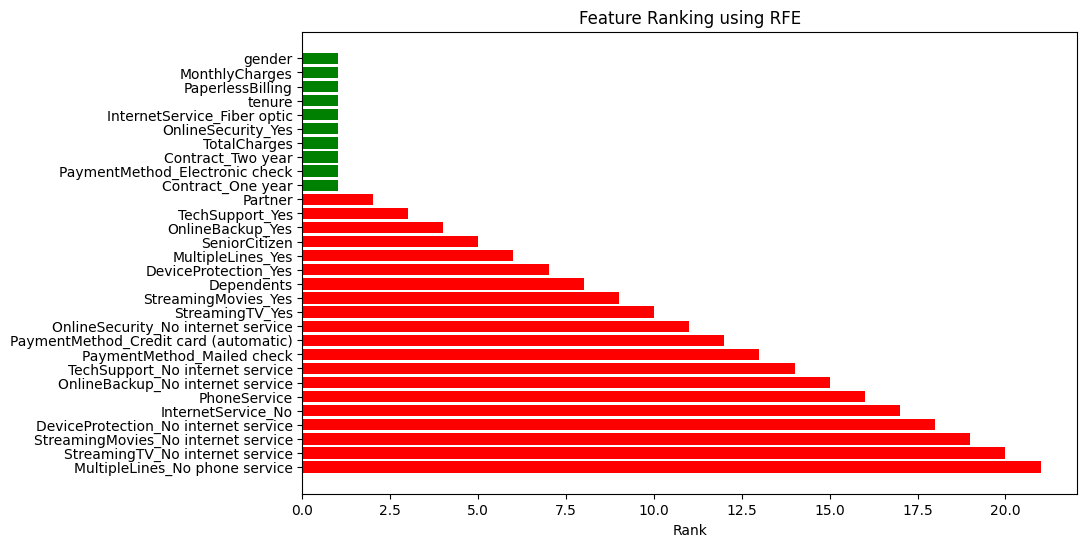

In [32]:
#plotting the results

plt.figure(figsize=(10,6))
plt.barh(rfe_results['Feature'], rfe_results['Rank'], color=rfe_results['Selected'].map({True: 'green', False: 'red'}))
plt.xlabel('Rank')
plt.title('Feature Ranking using RFE')
plt.gca().invert_yaxis() #invert y-axis to have the best features on top
plt.show()   

# Identifying Relevant Feature By Correlation Matrix

Customers with Paperless Billing are most likely to churn.


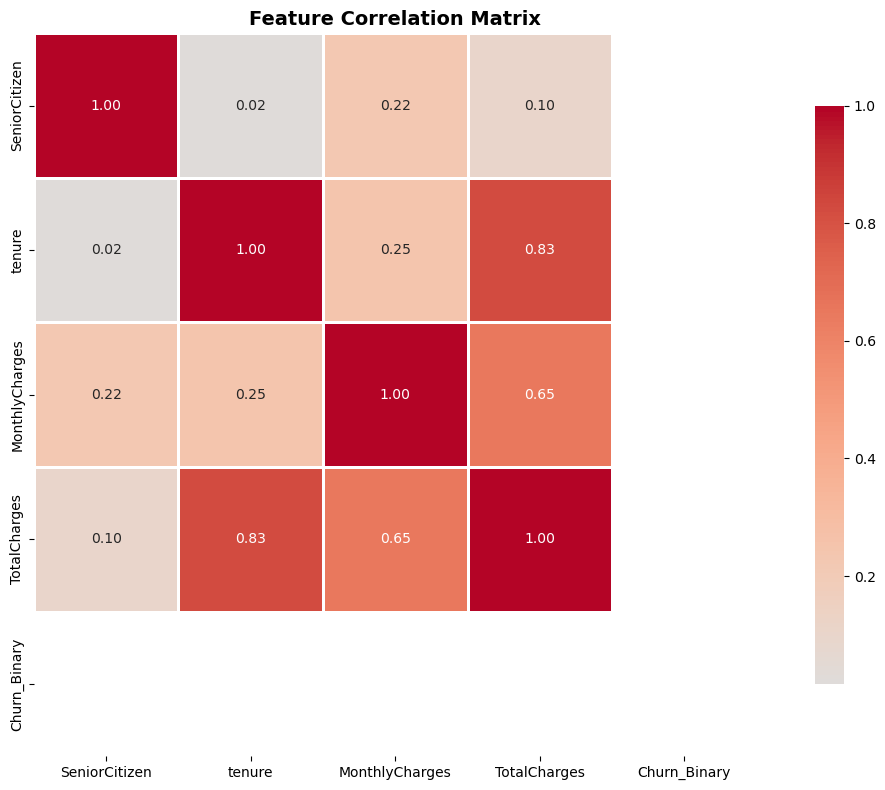

🔗 Features Most Correlated with Churn:
SeniorCitizen    NaN
tenure           NaN
MonthlyCharges   NaN
TotalCharges     NaN
Churn_Binary     NaN
Name: Churn_Binary, dtype: float64


In [24]:
# Create correlation heatmap
numeric_df = df_processed.select_dtypes(include=['int64', 'float64']).copy()
numeric_df['Churn_Binary'] = (df_processed['Churn'] == 'Yes').astype(int)

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlated features with Churn
print("🔗 Features Most Correlated with Churn:")
churn_corr = correlation_matrix['Churn_Binary'].sort_values(ascending=False)
print(churn_corr.head(10))

Project file: depi_final_project.ipynb

Extracted high-level summary and step-by-step explanation:

Total notebook cells: 48

Detected code sections by type:

-   Visualization: 3 code cells

-   Feature Encoding / Engineering: 2 code cells

-   Data Loading: 1 code cells

-   Data Cleaning: 3 code cells

-   Other / Utility: 16 code cells

-   Model Training: 1 code cells

Markdown cell #0: Project: Customer Churn Prediction and Analysis

Markdown cell #1: \# 1-Importting libraries

Code cell #2 (Visualization): This cell generates plots (feature
importance, ROC curve, confusion matrix). Code preview: !pip install
plotly !pip install nbformat

Code cell #3 (Feature Encoding / Engineering): This cell encodes
categorical variables or creates new features. Code preview: import
numpy as np import pandas as pd import matplotlib.pyplot as plt import
matplotlib.ticker as mtick import seaborn as sns import plotly.express
as px import plotly.graph_objects as go from plotly.subplots import
make_subplots from sklearn.model_selection import train_test_split from
sklearn.preprocessing import LabelEncoder, StandardScaler from
sklearn.ensemble import RandomForestClassifier f

Markdown cell #4: \# 2-Load and Explore the Dataset

Code cell #5 (Data Loading): This cell loads the dataset into a pandas
DataFrame (e.g., pd.read_csv). Code preview: \# Load dataset Data =
pd.read_csv(“WA_Fn-UseC\_-Telco-Customer-Churn.csv”) print(“shape:”,
Data.shape) \# Display first 5 rows print(“sample of Data”)
display(Data.head()) \# Basic info print(“Dataset info:”)
print(Data.info()) \# Summary statics print(“Statical Summary:”)
print(Data.describe())

Markdown cell #6: \# 3-Data Cleaning & Preprocessing

Code cell #7 (Data Cleaning): This cell handles missing values / type
conversions / basic cleaning. Code preview: \# check nulls
Data.isnull().sum()

Code cell #8 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: \# check duplicates
Data.duplicated().sum()

Code cell #9 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: \# view the column names of the
dataframe col_names = Data.columns col_names

Markdown cell #10: Our target variable is the `Churn` column. So, I will
check its distribution.

Code cell #11 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: \# check distribution of Churn
column Data\[‘Churn’\].value_counts()

Code cell #12 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: \# Some columns like
‘TotalCharges’ might be object type but numeric in nature \# Convert
them to numeric Data\[‘TotalCharges’\] =
pd.to_numeric(Data\[‘TotalCharges’\], errors=‘coerce’)

Code cell #13 (Data Cleaning): This cell handles missing values / type
conversions / basic cleaning. Code preview: \# Recheck missing values
after conversion print(“Missing values after conversion:”)
print(Data.isnull().sum())

Code cell #14 (Data Cleaning): This cell handles missing values / type
conversions / basic cleaning. Code preview: \# Fill missing TotalCharges
values with median
Data\[‘TotalCharges’\].fillna(Data\[‘TotalCharges’\].median(),
inplace=True)

Code cell #15 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: #Drop customerID (not useful for
prediction) Data.drop(‘customerID’, axis=1, inplace=True)

Markdown cell #16: Replaced blank spaces with NaN and converted
TotalCharges to numeric.

Markdown cell #17: \# 4-Encoding

Code cell #18 (Feature Encoding / Engineering): This cell encodes
categorical variables or creates new features. Code preview:
df_processed = Data.copy() \# Binary encoding for Yes/No columns
binary_cols = df_processed.select_dtypes(include=\[‘object’\]).columns
binary_cols = \[col for col in binary_cols if
df_processed\[col\].nunique() == 2\] label_encoders = {} for col in
binary_cols: le = LabelEncoder() df_processed\[col\] =
le.fit_transform(df_processed\[col\]) label_encoders\[col\] = le \#
One-hot encoding for multi

Markdown cell #19: \# 5-Feature Scaling

Code cell #20 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: \# Separate features and target
X = df_processed.drop(‘Churn’, axis=1) y = df_processed\[‘Churn’\] \#
Standardize numerical features scaler = StandardScaler() X_scaled =
scaler.fit_transform(X) X_scaled = pd.DataFrame(X_scaled,
columns=X.columns) print(f”Shape: {X_scaled.shape}“)

Markdown cell #21: Encoded all categorical columns using Label Encoding
to make them numerical.

Markdown cell #22: \# 7-Feature Importance

Code cell #23 (Model Training): This cell defines and trains one or more
ML models. Code preview: \# Identify the most important features using
Random Forest \# Create and train the model model =
RandomForestClassifier(random_state=42) model.fit(X_scaled, y) \# Get
the importance score for each feature importances =
pd.Series(model.feature_importances\_, index=X.columns) \# Sort the
features by importance and select the top 10 important_features =
importances.sort_values(ascending=False).head(10)

Markdown cell #24: \# 8-Plotting the top 10 important features

Code cell #25 (Visualization): This cell generates plots (feature
importance, ROC curve, confusion matrix). Code preview:
plt.figure(figsize=(8,5))
important_features.sort_values().plot(kind=‘barh’, color=‘skyblue’)
plt.title(‘Top 10 Important Features’) plt.xlabel(‘Feature Importance
Score’) plt.ylabel(‘Features’) plt.show()

Markdown cell #26: \### Feature Importance using Random Forest

Markdown cell #27: \# The dataset is now clean, consistent, and fully
numeric, ready for exploratory data analysis (EDA) and model development

Markdown cell #28: \# 9-Exploratory Data Analysis (EDA) & Visualizations

Markdown cell #29: Let us first start with exploring our data set, to
better understand the patterns in the data and potentially form some
hypothesis. First we will look at the distribution of individual
variables and then slice and dice our data for any interesting trends.

Code cell #30 (Visualization): This cell generates plots (feature
importance, ROC curve, confusion matrix). Code preview:
fig=make_subplots(rows=1,cols=2) fig = make_subplots(rows=1, cols=2,
specs=\[\[{‘type’:‘domain’}, {‘type’:‘domain’}\]\])
fig.add_trace(go.Pie(labels=\[‘Male’,‘Female’\],
values=Data\[‘gender’\].value_counts(), name=“Gender”), 1, 1)
fig.add_trace(go.Pie(labels=\[‘No’, ‘Yes’\],
values=Data\[‘Churn’\].value_counts(), name=“Churn”), 1, 2)
fig.update_traces(hole=.4, hoverinfo=“label+pe

Markdown cell #31: 26.6 % of customers switched to another firm.

Code cell #32 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: churn_map={0:‘No’,1:‘Yes’}
contract_map={0:‘Month-to-month’,1:‘One year’,2:‘Two year’}
fig=px.histogram(Data,x=Data\[‘Churn’\].map(churn_map),color=Data\[‘Contract’\].map(contract_map),barmode=‘group’,labels={‘x’:
‘Churn’}) fig.update_layout() fig.update_layout(width=700, height=500,
bargap=0.1) fig.update_layout(title_text=“<b>Churn Distribution w.r.t.
Internet Service </b>”) fig.show()

Markdown cell #33: About 75% of customer with Month-to-Month Contract
opted to move out as compared to 13% of customrs with One Year Contract
and 3% with Two Year Contract

Code cell #34 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: PaymentMethod_map = { 0: ‘Bank
transfer’, 1: ‘Credit card’, 2: ‘Electronic check’, 3: ‘Mailed check’ }
counts = Data\[‘PaymentMethod’\].value_counts() labels =
counts.index.map(PaymentMethod_map) values =
Data\[‘PaymentMethod’\].value_counts() fig =
go.Figure(data=\[go.Pie(labels=labels, values=values, hole=0.3)\])
fig.update_layout( title_text=“<b>Payment Method Distribution</b>

Code cell #35 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: churn_map={0:‘No’,1:‘Yes’}
PaymentMethod_map = { 0: ‘Bank transfer’, 1: ‘Credit card’, 2:
‘Electronic check’, 3: ‘Mailed check’ }
fig=px.histogram(Data,x=Data\[‘Churn’\].map(churn_map),color=Data\[‘PaymentMethod’\].map(PaymentMethod_map),barmode=‘group’,title=“<b>Customer
Payment Method distribution w.r.t. Churn</b>”,labels={‘x’: ‘Churn’})
fig.update_layout(width=700, height=500, bar

Markdown cell #36: Major customers who moved out were having Electronic
Check as Payment Method.

Code cell #37 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: Data\[‘gender’\].value_counts()

Code cell #38 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview:
Data\[‘InternetService’\].unique() gender_map={0:‘Female’,1:‘Male’}
InternetService_mape={0:‘DSL’,1:‘Fiber optic’,2:‘No’}
Data\[Data\[‘gender’\]==1\]\[\[“InternetService”,
“Churn”\]\].value_counts()

Code cell #39 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview:
Data\[‘InternetService’\].unique() gender_map={0:‘Female’,1:‘Male’}
InternetService_mape={0:‘DSL’,1:‘Fiber optic’,2:‘No’}
Data\[Data\[‘gender’\]==0\]\[\[“InternetService”,
“Churn”\]\].value_counts()

Code cell #40 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview:
InternetService_mape={0:‘DSL’,1:‘Fiber optic’,2:‘No’}
churn_map={0:‘No’,1:‘Yes’}
fig=px.histogram(Data,x=Data\[‘Churn’\].map(churn_map),color=Data\[‘InternetService’\].map(InternetService_mape),barmode=‘group’,labels={‘x’:
‘Churn’}) fig.update_layout(width=700, height=500, bargap=0.1)
fig.update_layout(title_text=“<b>Churn Distribution w.r.t. Internet
Service </b>”) fig.show()

Markdown cell #41: Customers having DSL service are majority in number
and have less churn rate compared to Fibre optic service.

Code cell #42 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: dependents_map={0:‘No’,1:‘Yes’}
churn_map={0:‘No’,1:‘Yes’}
fig=px.histogram(Data,x=Data\[‘Churn’\].map(churn_map),color=Data\[‘Dependents’\].map(dependents_map),barmode=‘group’,labels={‘x’:‘Churn’})
fig.update_layout(title_text=“<b>Churn Distribution w.r.t. Dependents
</b>”) fig.show()

Markdown cell #43: Customers without dependents are more likely to churn

Code cell #44 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: Partner_map={1:‘Yes’,0:‘No’}
churn_map={0:‘No’,1:‘Yes’}
fig=px.histogram(Data,x=Data\[‘Churn’\].map(churn_map),color=Data\[‘Partner’\].map(Partner_map),barmode=‘group’,labels={‘x’:‘Churn’})
fig.update_layout(title_text=“<b>Churn Distribution w.r.t. Partner
</b>”) fig.show()

Markdown cell #45: Customers that doesn’t have partners are more likely
to churn

Code cell #46 (Other / Utility): Utility or other operations (imports,
helper functions, loops). Code preview: Partner_map={1:‘Yes’,0:‘No’}
PaperlessBilling_map={1:‘Yes’,0:‘No’}
fig=px.histogram(Data,x=Data\[‘Churn’\].map(churn_map),color=Data\[‘PaperlessBilling’\].map(PaperlessBilling_map),barmode=‘group’,labels={‘x’:‘Churn’})
fig.update_layout(title_text=“<b>Churn Distribution w.r.t.
PaperlessBilling </b>”) fig.show()

Markdown cell #47: Customers with Paperless Billing are most likely to
churn.

Feature Extraction¶


In [36]:
new_features=Data.copy()
new_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Create an annual categorical variable from the variable Tenure

new_features.loc[(new_features["tenure"]>=0) & (new_features["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
new_features.loc[(new_features["tenure"]>12) & (new_features["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
new_features.loc[(new_features["tenure"]>24) & (new_features["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
new_features.loc[(new_features["tenure"]>36) & (new_features["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
new_features.loc[(new_features["tenure"]>48) & (new_features["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
new_features.loc[(new_features["tenure"]>60) & (new_features["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

In [38]:
new_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 Year
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 Year
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 Year
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 Year
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1-2 Year
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,5-6 Year
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-1 Year
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-1 Year


In [ ]:
# Specify customers with a 1 or 2 year contract as Engaged

new_features["NEW_Engaged"] = new_features["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)
new_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 Year,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 Year,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 Year,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 Year,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 Year,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1-2 Year,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,5-6 Year,1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-1 Year,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-1 Year,0


In [41]:
# People who do not receive any support, backup or protection

new_features["NEW_noProt"] = new_features.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

In [42]:
new_features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 Year,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,2-3 Year,1,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 Year,0,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 Year,1,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 Year,0,1


In [44]:
# Young customers with a monthly contract

new_features["NEW_Young_Not_Engaged"] = new_features.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)
new_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 Year,0,1,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,2-3 Year,1,1,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 Year,0,1,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 Year,1,1,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 Year,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,One year,Yes,Mailed check,84.80,1990.50,No,1-2 Year,1,1,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,5-6 Year,1,1,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-1 Year,0,1,1
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-1 Year,0,1,0


In [45]:
# Total number of services received by the person

new_features['NEW_TotalServices'] = (new_features[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


In [46]:
# People who receive any streaming service

new_features["NEW_FLAG_ANY_STREAMING"] = new_features.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

In [47]:
# Does the person make automatic payments?

new_features["NEW_FLAG_AutoPayment"] = new_features["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

In [49]:
# average monthly payment

new_features["NEW_AVG_Charges"] = new_features["TotalCharges"] / (new_features["tenure"] + 1)

In [50]:
# Increase in current price compared to average price

new_features["NEW_Increase"] = new_features["NEW_AVG_Charges"] / new_features["MonthlyCharges"]

In [51]:
# Fee per service

new_features["NEW_AVG_Service_Fee"] = new_features["MonthlyCharges"] / (new_features['NEW_TotalServices'] + 1)

In [54]:
new_features.shape
new_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0-1 Year,0,1,1,1,0,0,14.925000,0.500000,14.925000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,2-3 Year,1,1,0,3,0,0,53.985714,0.947949,14.237500
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,0-1 Year,0,1,1,3,0,0,36.050000,0.669452,13.462500
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,3-4 Year,1,1,0,3,0,1,40.016304,0.946012,10.575000
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0-1 Year,0,1,1,1,0,0,50.550000,0.714993,35.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,1-2 Year,1,1,0,6,1,0,79.620000,0.938915,12.114286
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,5-6 Year,1,1,0,5,1,1,100.861644,0.977342,17.200000
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,0-1 Year,0,1,1,1,0,0,28.870833,0.975366,14.800000
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,0-1 Year,0,1,0,1,0,0,61.320000,0.824194,37.200000


In [56]:
new_features = pd.get_dummies(new_features, columns=['NEW_TENURE_YEAR'])


In [57]:
new_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,NEW_TENURE_YEAR_0-1 Year,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,14.925000,0.500000,14.925000,True,False,False,False,False,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,0,53.985714,0.947949,14.237500,False,False,True,False,False,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,0,36.050000,0.669452,13.462500,True,False,False,False,False,False
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,1,40.016304,0.946012,10.575000,False,False,False,True,False,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0,50.550000,0.714993,35.350000,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,0,79.620000,0.938915,12.114286,False,True,False,False,False,False
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,1,100.861644,0.977342,17.200000,False,False,False,False,False,True
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,0,28.870833,0.975366,14.800000,True,False,False,False,False,False
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,0,61.320000,0.824194,37.200000,True,False,False,False,False,False
